In [1]:
import pandas as pd

seoul_ua3_log = pd.read_csv("C:/data/now_used/전체데이터_연면적약간제거.csv")

In [2]:
seoul_ua3_log = seoul_ua3_log[['rent_ua_log', '연면적m2_log', 'usage_area_log', '지하철거리m_log', '승객수점수_log',
       '건물별전기사용량_log', '본번별평균사용량_log', '횡단보도거리m_log', '건물연차_log',
       '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log', '공시지가_log', '도로추정크기_log',
       '유동인구비율_20대_log', '유동인구비율_30대_log']]

seoul_ua3_log

,rent_ua_log,연면적m2_log,usage_area_log,지하철거리m_log,승객수점수_log,건물별전기사용량_log,본번별평균사용량_log,횡단보도거리m_log,건물연차_log,평균월매출건수_log,평균주말매출금액_log,편의점임대료_log,공시지가_log,도로추정크기_log,유동인구비율_20대_log,유동인구비율_30대_log
0,2.576828,9.057781,4.634729,0.317097,11.670477,10.966265,9.668623,4.564931,2.484907,11.431043,19.673762,11.099402,16.607289,2.833213,3.477541,3.016515
1,1.329399,5.451167,4.064229,1.566886,10.276446,7.882315,7.882315,2.381712,2.197225,11.001916,19.563263,11.121873,15.860231,3.392829,3.296947,3.075005
2,0.711651,5.536547,4.075841,1.339887,10.440563,5.342334,5.966147,3.674244,2.197225,10.989268,18.558816,11.632675,15.400246,1.386294,3.270709,2.854169
3,1.464121,8.260837,5.913638,0.739877,10.638084,10.159524,9.668623,5.124638,1.945910,11.431043,19.673762,11.350467,16.243847,2.079442,3.477541,3.016515
4,2.849902,6.801072,4.751001,1.475947,11.454120,9.192482,9.192482,3.872157,3.951244,11.585469,20.272411,11.523086,17.182806,2.917771,3.316003,3.091042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,1.434304,8.530840,6.088637,1.274689,10.766258,11.254453,10.124375,3.493071,3.258097,10.717480,19.324228,10.567797,16.032973,3.555348,3.033510,2.943386
8313,2.345590,6.895723,3.718196,-0.314921,10.421372,9.820052,9.414851,3.155424,3.688879,11.020431,19.606774,10.533602,16.347619,3.555348,3.038313,2.814210
8314,1.324886,6.609336,4.848900,0.715952,9.737559,9.576995,9.087692,4.582416,3.663562,11.020431,19.606774,10.533602,15.678660,1.386294,3.038313,2.814210
8315,1.541676,6.490724,5.673564,1.819036,10.009964,8.454253,9.200290,3.070895,3.295837,10.670466,19.033880,10.581802,15.726829,3.218876,2.954910,2.771338


In [3]:
# r-studio의 poly함수를 python에서 구현하기
import numpy as np

def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

for i in seoul_ua3_log.columns[1:]:
    df = pd.DataFrame(poly(seoul_ua3_log['{}'.format(i)], 2), columns = ['{}_1'.format(i), '{}_2'.format(i)])
    seoul_ua3_log = pd.concat([seoul_ua3_log, df], axis = 1)
    
seoul_ua3_log

<ipython-input-3-ae3f985d873c>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.transpose(np.vstack((x**k for k in range(p+1))))


,rent_ua_log,연면적m2_log,usage_area_log,지하철거리m_log,승객수점수_log,건물별전기사용량_log,본번별평균사용량_log,횡단보도거리m_log,건물연차_log,평균월매출건수_log,...,편의점임대료_log_1,편의점임대료_log_2,공시지가_log_1,공시지가_log_2,도로추정크기_log_1,도로추정크기_log_2,유동인구비율_20대_log_1,유동인구비율_20대_log_2,유동인구비율_30대_log_1,유동인구비율_30대_log_2
0,2.576828,9.057781,4.634729,0.317097,11.670477,10.966265,9.668623,4.564931,2.484907,11.431043,...,-0.001395,-0.006387,-0.016319,0.004809,-0.000888,0.009637,-0.008757,-0.006155,0.001475,-0.007647
1,1.329399,5.451167,4.064229,1.566886,10.276446,7.882315,7.882315,2.381712,2.197225,11.001916,...,-0.001794,-0.006355,-0.001940,-0.004729,-0.009882,-0.006460,-0.002623,-0.008259,-0.001344,-0.006817
2,0.711651,5.536547,4.075841,1.339887,10.440563,5.342334,5.966147,3.674244,2.197225,10.989268,...,-0.010859,-0.001092,0.006913,-0.002455,0.022368,-0.014006,-0.001732,-0.008164,0.009298,-0.004872
3,1.464121,8.260837,5.913638,0.739877,10.638084,10.159524,9.668623,5.124638,1.945910,11.431043,...,-0.005851,-0.005075,-0.009324,-0.001878,0.011227,0.009065,-0.008757,-0.006155,0.001475,-0.007647
4,2.849902,6.801072,4.751001,1.475947,11.454120,9.192482,9.192482,3.872157,3.951244,11.585469,...,-0.008914,-0.002954,-0.027396,0.023325,-0.002247,0.008108,-0.003270,-0.008264,-0.002117,-0.006420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,1.434304,8.530840,6.088637,1.274689,10.766258,11.254453,10.124375,3.493071,3.258097,10.717480,...,0.008039,-0.002227,-0.005265,-0.003980,-0.012494,-0.013773,0.006324,-0.002699,0.004999,-0.007321
8313,2.345590,6.895723,3.718196,-0.314921,10.421372,9.820052,9.414851,3.155424,3.688879,11.020431,...,0.008646,-0.001637,-0.011321,-0.000364,-0.012494,-0.013773,0.006161,-0.002892,0.011223,-0.003044
8314,1.324886,6.609336,4.848900,0.715952,9.737559,9.576995,9.087692,4.582416,3.663562,11.020431,...,0.008646,-0.001637,0.001554,-0.004574,0.022368,-0.014006,0.006161,-0.002892,0.011223,-0.003044
8315,1.541676,6.490724,5.673564,1.819036,10.009964,8.454253,9.200290,3.070895,3.295837,10.670466,...,0.007790,-0.002457,0.000627,-0.004709,-0.007086,0.000052,0.008993,0.000943,0.013289,-0.000580


In [4]:
seoul_ua3_log.isnull().sum()

rent_ua_log         0
연면적m2_log           0
usage_area_log      0
지하철거리m_log          0
승객수점수_log           0
건물별전기사용량_log        0
본번별평균사용량_log        0
횡단보도거리m_log         0
건물연차_log            0
평균월매출건수_log         0
평균주말매출금액_log        0
편의점임대료_log          0
공시지가_log            0
도로추정크기_log          0
유동인구비율_20대_log      0
유동인구비율_30대_log      0
연면적m2_log_1         0
연면적m2_log_2         0
usage_area_log_1    0
usage_area_log_2    0
지하철거리m_log_1        0
지하철거리m_log_2        0
승객수점수_log_1         0
승객수점수_log_2         0
건물별전기사용량_log_1      0
건물별전기사용량_log_2      0
본번별평균사용량_log_1      0
본번별평균사용량_log_2      0
횡단보도거리m_log_1       0
횡단보도거리m_log_2       0
건물연차_log_1          0
건물연차_log_2          0
평균월매출건수_log_1       0
평균월매출건수_log_2       0
평균주말매출금액_log_1      0
평균주말매출금액_log_2      0
편의점임대료_log_1        0
편의점임대료_log_2        0
공시지가_log_1          0
공시지가_log_2          0
도로추정크기_log_1        0
도로추정크기_log_2        0
유동인구비율_20대_log_1    0
유동인구비율_20대_log_2    0
유동인구비율_30대_log_1    0
유동인구비율_30대

In [5]:
from statsmodels.formula.api import ols
model = ols('rent_ua_log ~ usage_area_log_1 + usage_area_log_2 + 지하철거리m_log_1 + 지하철거리m_log_2 + 승객수점수_log_1 + 승객수점수_log_2 + 건물별전기사용량_log_1 + 건물별전기사용량_log_2 + 본번별평균사용량_log_1 + 본번별평균사용량_log_2 + 횡단보도거리m_log_1 + 횡단보도거리m_log_2 + 건물연차_log_1 + 건물연차_log_2 + 평균월매출건수_log_1 + 평균월매출건수_log_2 + 평균주말매출금액_log_1 + 평균주말매출금액_log_2 + 편의점임대료_log_1 + 편의점임대료_log_2 + 공시지가_log_1 + 공시지가_log_2 + 도로추정크기_log_1 + 도로추정크기_log_2 + 유동인구비율_20대_log_1 + 유동인구비율_20대_log_2 + 유동인구비율_30대_log_1 + 유동인구비율_30대_log_2', seoul_ua3_log)

# 모형 적합
res = model.fit()

# 분석 결과 확인
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_ua_log   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:23:37   Log-Likelihood:                -4140.5
No. Observations:                8317   AIC:                             8339.
Df Residuals:                    8288   BIC:                             8543.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3957      0.004    319.184      0.000       1.387       1.404
usage_area_log_1    -9.3267      0.438    -21.317      0.000     -10.184      -8.469
usage_area_log_2     2.7241      0.404      6.749      0.000       1.933       3.515
지하철거리m_log_1         2.6543      0.484      5.487      0.000       1.706       3.603
지하철거리m_log_2         1.0377      0.432      2.400      0.016       0.190       1.885
승객수점수_log_1          5.2198      0.564      9.248      0.000       4.113       6.326
승객수점수_log_2          0.5855      0.432      1.354      0.176      -0.262       1.433
건물별전기사용량_log_1       2.8660      0.625      4.585      0.000       1.641       4.091
건물별전기사용량_log_2      -1.1137      0.517     -2.155      0.031      -2.127      -0.101
본번별평균사용량_log_1       4.6396      0.624      7.437      0.000       3.417       5.863
본번별평균사용량_log_2       0.2640      0.492      0.536      0.592      -0.701       1.228
횡단보도거리m_log_1       -2.1945      0.466     -4.708      0.000      -3.108      -1.281
횡단보도거리m_log_2        1.8111      0.412      4.396      0.000       1.003       2.619
건물연차_log_1          -4.4298      0.428    -10.348      0.000      -5.269      -3.591
건물연차_log_2           2.3844      0.414      5.765      0.000       1.574       3.195
평균월매출건수_log_1        5.4670      0.967      5.652      0.000       3.571       7.363
평균월매출건수_log_2        0.5804      0.712      0.816      0.415      -0.815       1.976
평균주말매출금액_log_1      -7.8070      0.915     -8.530      0.000      -9.601      -6.013
평균주말매출금액_log_2       0.0006      0.722      0.001      0.999      -1.416       1.417
편의점임대료_log_1        -2.1949      0.466     -4.713      0.000      -3.108      -1.282
편의점임대료_log_2         0.4651      0.406      1.147      0.252      -0.330       1.260
공시지가_log_1         -21.9466      0.602    -36.484      0.000     -23.126     -20.767
공시지가_log_2           1.8773      0.418      4.493      0.000       1.058       2.696
도로추정크기_log_1        -3.7813      0.518     -7.304      0.000      -4.796      -2.766
도로추정크기_log_2        -0.7277      0.433     -1.680      0.093      -1.577       0.121
유동인구비율_20대_log_1    -3.4523      0.502     -6.877      0.000      -4.436      -2.468
유동인구비율_20대_log_2     0.8137      0.475      1.714      0.087      -0.117       1.745
유동인구비율_30대_log_1     1.1965      0.502      2.386      0.017       0.213       2.180
유동인구비율_30대_log_2     0.2521      0.448      0.563      0.574      -0.626       1.130
==============================================================================
Omnibus:                      350.977   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              967.741
Skew:                          -0.181   Prob(JB):                    7.21e-211
Kurtosis:                       4.631   Cond. N

In [6]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area_log_1,1.203805
1,usage_area_log_2,1.024479
2,지하철거리m_log_1,1.471321
3,지하철거리m_log_2,1.175927
4,승객수점수_log_1,2.003123
5,승객수점수_log_2,1.175932
6,건물별전기사용량_log_1,2.456651
7,건물별전기사용량_log_2,1.679062
8,본번별평균사용량_log_1,2.447473
9,본번별평균사용량_log_2,1.522491


In [7]:
# p-value값이 0.05 이상인 애는 원래 log데이터로 사용해보기

from statsmodels.formula.api import ols
model = ols('rent_ua_log ~ 연면적m2_log + usage_area_log_1 + usage_area_log_2 + 지하철거리m_log_1 + 지하철거리m_log_2 + 승객수점수_log + 건물별전기사용량_log_1 + 건물별전기사용량_log_2 + 본번별평균사용량_log + 횡단보도거리m_log_1 + 횡단보도거리m_log_2 + 건물연차_log_1 + 건물연차_log_2 + 평균월매출건수_log + 평균주말매출금액_log + 편의점임대료_log + 공시지가_log_1 + 공시지가_log_2 + 도로추정크기_log_1 + 도로추정크기_log_2 + 유동인구비율_20대_log + 유동인구비율_30대_log', seoul_ua3_log)

# 모형 적합
res = model.fit()

# 분석 결과 확인
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_ua_log   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     322.8
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:23:55   Log-Likelihood:                -4095.4
No. Observations:                8317   AIC:                             8237.
Df Residuals:                    8294   BIC:                             8398.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9723      0.213     -4.555      0.000      -1.391      -0.554
연면적m2_log           -0.0812      0.008    -10.132      0.000      -0.097      -0.065
usage_area_log_1    -8.1551      0.448    -18.192      0.000      -9.034      -7.276
usage_area_log_2     2.8644      0.401      7.136      0.000       2.078       3.651
지하철거리m_log_1         2.0765      0.477      4.354      0.000       1.142       3.011
지하철거리m_log_2         1.1480      0.410      2.803      0.005       0.345       1.951
승객수점수_log            0.0646      0.007      9.383      0.000       0.051       0.078
건물별전기사용량_log_1       8.1563      0.811     10.051      0.000       6.566       9.747
건물별전기사용량_log_2      -3.3234      0.487     -6.829      0.000      -4.277      -2.369
본번별평균사용량_log         0.0523      0.006      8.634      0.000       0.040       0.064
횡단보도거리m_log_1       -1.8303      0.464     -3.948      0.000      -2.739      -0.922
횡단보도거리m_log_2        1.5742      0.410      3.843      0.000       0.771       2.377
건물연차_log_1          -6.0372      0.452    -13.356      0.000      -6.923      -5.151
건물연차_log_2           1.5113      0.419      3.608      0.000       0.690       2.332
평균월매출건수_log         -0.1124      0.019     -6.058      0.000      -0.149      -0.076
평균주말매출금액_log         0.1259      0.015      8.479      0.000       0.097       0.155
편의점임대료_log           0.0390      0.008      4.764      0.000       0.023       0.055
공시지가_log_1         -22.6743      0.575    -39.406      0.000     -23.802     -21.546
공시지가_log_2           2.0619      0.409      5.044      0.000       1.261       2.863
도로추정크기_log_1        -4.3701      0.514     -8.508      0.000      -5.377      -3.363
도로추정크기_log_2        -1.0849      0.431     -2.518      0.012      -1.929      -0.240
유동인구비율_20대_log       0.1034      0.016      6.335      0.000       0.071       0.135
유동인구비율_30대_log      -0.0741      0.022     -3.376      0.001      -0.117      -0.031
==============================================================================
Omnibus:                      354.565   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              994.682
Skew:                          -0.177   Prob(JB):                    1.02e-216
Kurtosis:                       4.657   Cond. No.                     5.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## lightGBM

In [8]:
seoul = seoul_ua3_log.copy()
seoul.columns

Index(['rent_ua_log', '연면적m2_log', 'usage_area_log', '지하철거리m_log', '승객수점수_log',
       '건물별전기사용량_log', '본번별평균사용량_log', '횡단보도거리m_log', '건물연차_log',
       '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log', '공시지가_log', '도로추정크기_log',
       '유동인구비율_20대_log', '유동인구비율_30대_log', '연면적m2_log_1', '연면적m2_log_2',
       'usage_area_log_1', 'usage_area_log_2', '지하철거리m_log_1', '지하철거리m_log_2',
       '승객수점수_log_1', '승객수점수_log_2', '건물별전기사용량_log_1', '건물별전기사용량_log_2',
       '본번별평균사용량_log_1', '본번별평균사용량_log_2', '횡단보도거리m_log_1', '횡단보도거리m_log_2',
       '건물연차_log_1', '건물연차_log_2', '평균월매출건수_log_1', '평균월매출건수_log_2',
       '평균주말매출금액_log_1', '평균주말매출금액_log_2', '편의점임대료_log_1', '편의점임대료_log_2',
       '공시지가_log_1', '공시지가_log_2', '도로추정크기_log_1', '도로추정크기_log_2',
       '유동인구비율_20대_log_1', '유동인구비율_20대_log_2', '유동인구비율_30대_log_1',
       '유동인구비율_30대_log_2'],
      dtype='object')

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

In [11]:
#전체변수

x = seoul[['연면적m2_log', 'usage_area_log', '지하철거리m_log', '승객수점수_log',
       '건물별전기사용량_log', '본번별평균사용량_log', '횡단보도거리m_log', '건물연차_log',
       '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log', '공시지가_log', '도로추정크기_log',
       '유동인구비율_20대_log', '유동인구비율_30대_log', '연면적m2_log_1', '연면적m2_log_2',
       'usage_area_log_1', 'usage_area_log_2', '지하철거리m_log_1', '지하철거리m_log_2',
       '승객수점수_log_1', '승객수점수_log_2', '건물별전기사용량_log_1', '건물별전기사용량_log_2',
       '본번별평균사용량_log_1', '본번별평균사용량_log_2', '횡단보도거리m_log_1', '횡단보도거리m_log_2',
       '건물연차_log_1', '건물연차_log_2', '평균월매출건수_log_1', '평균월매출건수_log_2',
       '평균주말매출금액_log_1', '평균주말매출금액_log_2', '편의점임대료_log_1', '편의점임대료_log_2',
       '공시지가_log_1', '공시지가_log_2', '도로추정크기_log_1', '도로추정크기_log_2',
       '유동인구비율_20대_log_1', '유동인구비율_20대_log_2', '유동인구비율_30대_log_1',
       '유동인구비율_30대_log_2']]
y = seoul['rent_ua_log']


In [12]:
# train/test 데이터로 나누기
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=2)


train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [13]:
params = {'learning_rate': 0.005, 
          'max_depth': 20, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'rmse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [14]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)


predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10167
[LightGBM] [Info] Number of data points in the train set: 5821, number of used features: 45
[LightGBM] [Info] Start training from score 1.404262
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.445983
[200]	valid_0's rmse: 0.406347
[300]	valid_0's rmse: 0.389451
[400]	valid_0's rmse: 0.381529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's rmse: 0.37767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [15]:
from math import sqrt

rmse = sqrt(mean_squared_error(test_y, predict_test))
r2 = r2_score(test_y, predict_test)

print('RMSE: ', rmse)
print('R2 score: ', r2)

RMSE:  0.373999153217288
R2 score:  0.5047715423677734


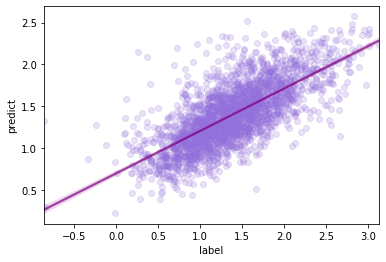

In [16]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['label','predict']


sns.regplot(x = 'label', y = 'predict', data = final_result,
           scatter_kws = {'color' : 'mediumpurple', 'alpha' : 0.2},
           line_kws = {'color' : 'purple', 'alpha' : 0.7})

In [34]:
# 회귀분석에서 결과 좋았던 변수만

x = seoul[['연면적m2_log', '승객수점수_log',
       '본번별평균사용량_log', 
       '평균월매출건수_log', '평균주말매출금액_log',
       '유동인구비율_20대_log', '유동인구비율_30대_log', 
       'usage_area_log_1', 'usage_area_log_2', '지하철거리m_log_1', '지하철거리m_log_2',
       '건물별전기사용량_log_1', '건물별전기사용량_log_2',
       '횡단보도거리m_log_1', '횡단보도거리m_log_2',
       '건물연차_log_1', '건물연차_log_2', 
       '공시지가_log_1', '공시지가_log_2', '도로추정크기_log_1', '도로추정크기_log_2']]
y = seoul['rent_ua_log']

In [35]:
# train/test 데이터로 나누기
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=2)


train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 


In [36]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)


predict_train = model.predict(train_x)
predict_test = model.predict(test_x)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4481
[LightGBM] [Info] Number of data points in the train set: 5821, number of used features: 21
[LightGBM] [Info] Start training from score 1.404262
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.447148
[200]	valid_0's rmse: 0.406993
[300]	valid_0's rmse: 0.38958
[400]	valid_0's rmse: 0.381839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's rmse:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's rmse: 0.374636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [37]:
from math import sqrt

rmse = sqrt(mean_squared_error(test_y, predict_test))
r2 = r2_score(test_y, predict_test)     # 0.5026030552743965

print('RMSE: ', rmse)
print('R2 score: ', r2)

RMSE:  0.37463220669061564
R2 score:  0.5030936165107918


C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


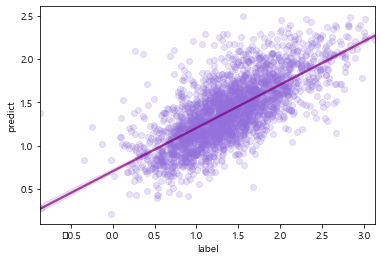

In [41]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['label','predict']


sns.regplot(x = 'label', y = 'predict', data = final_result,
           scatter_kws = {'color' : 'mediumpurple', 'alpha' : 0.2},
           line_kws = {'color' : 'purple', 'alpha' : 0.7})


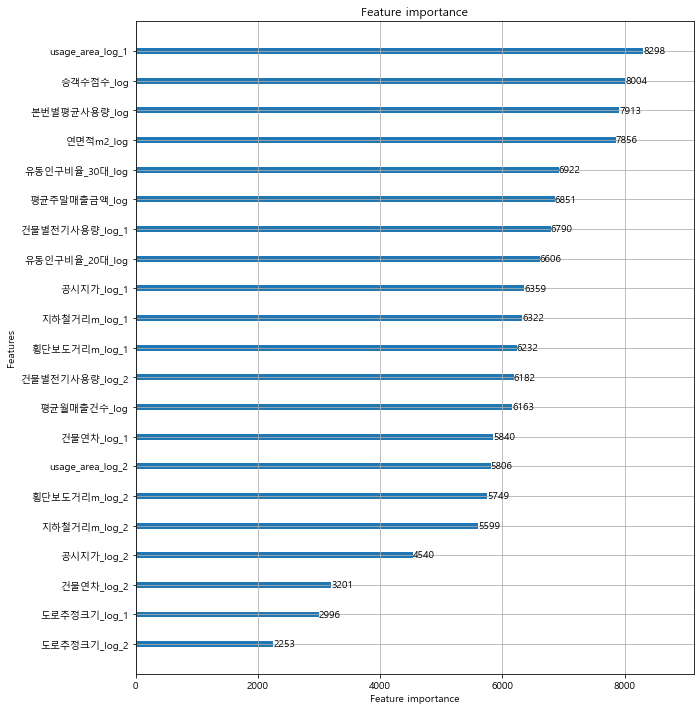

In [39]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(model, ax = ax)